# Assignment 2: Breast cancer classification model
<hr style="font-weight:bold"></hr>

**Student ID :** 100810343

**Name :** Ramasubramanian Dharumaperumal

**Subject :** AIDI-2004-02 - AI in enterprise system

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

In [4]:
# importing the dataset
df = pd.read_csv('./dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [7]:
df.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

## Exploratory data analysis
<hr></hr>

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Now let us look at how many Benign and malignant cases are there in the dataset

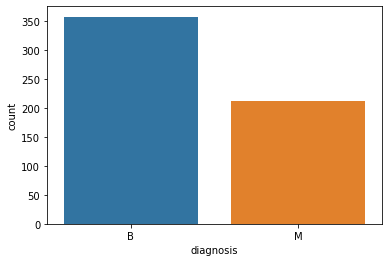

In [9]:
sns.countplot(x="diagnosis", data=df);

We see that there are a total of 357 beign cases and 212 malignant cases.

Now let us 

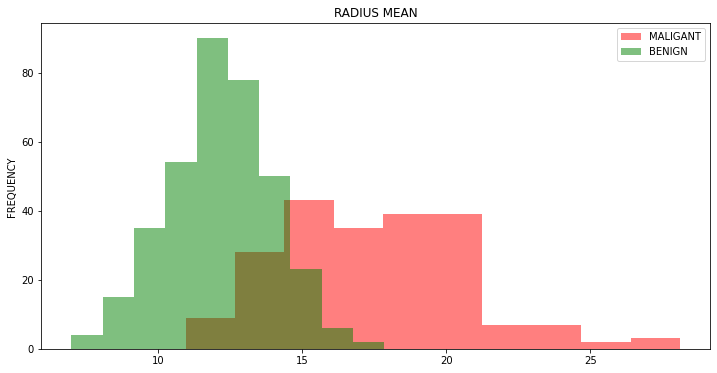

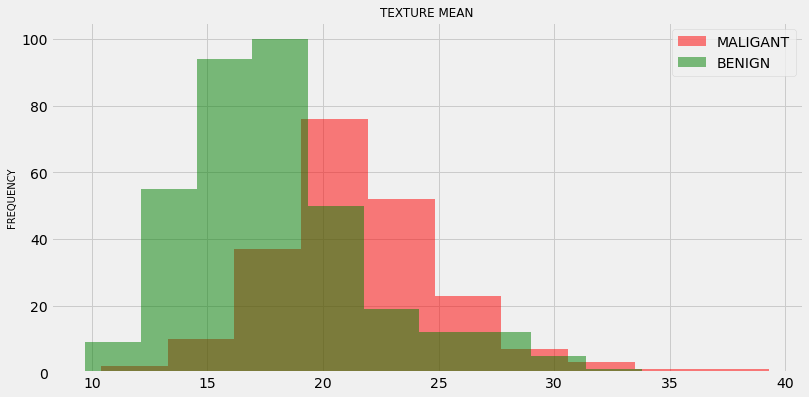

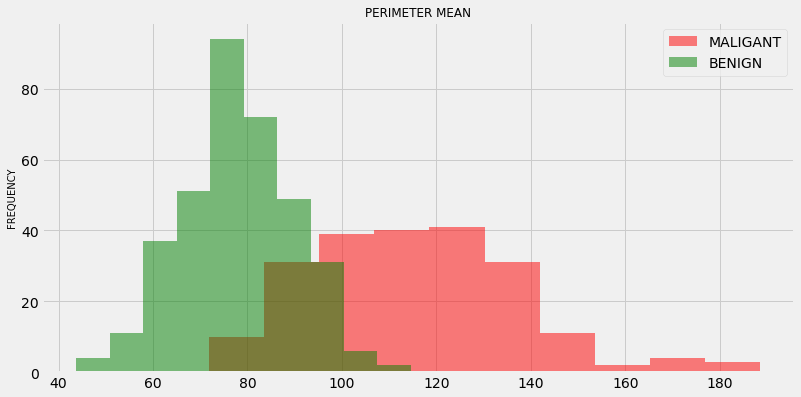

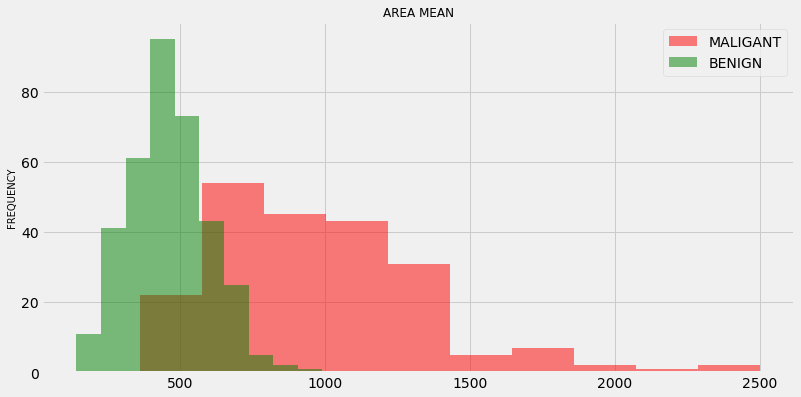

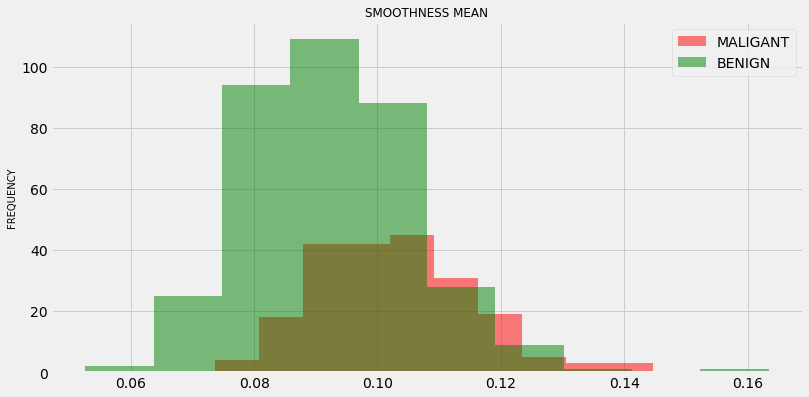

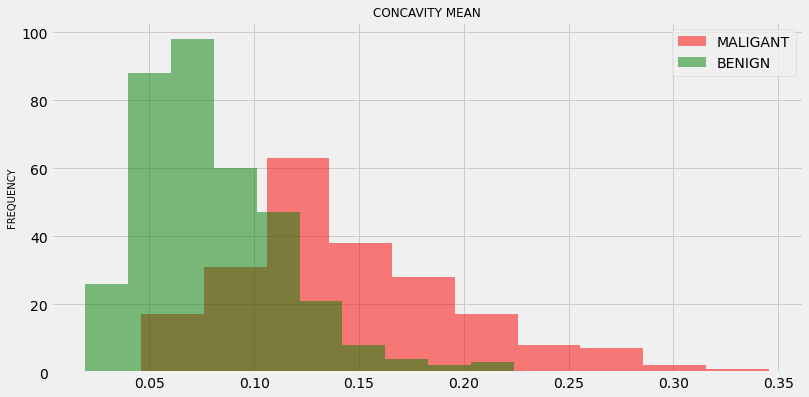

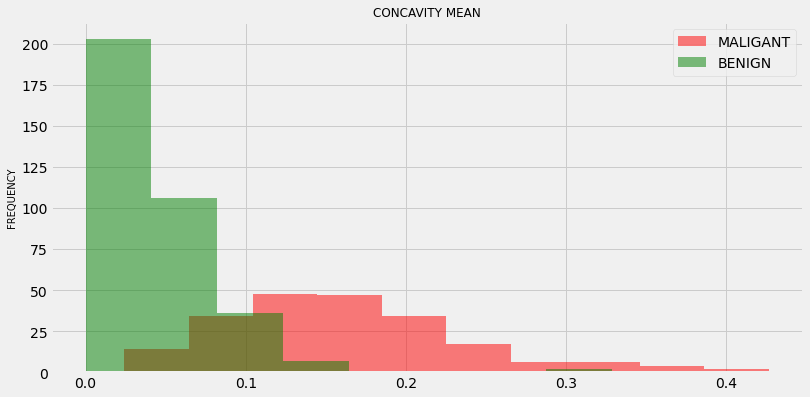

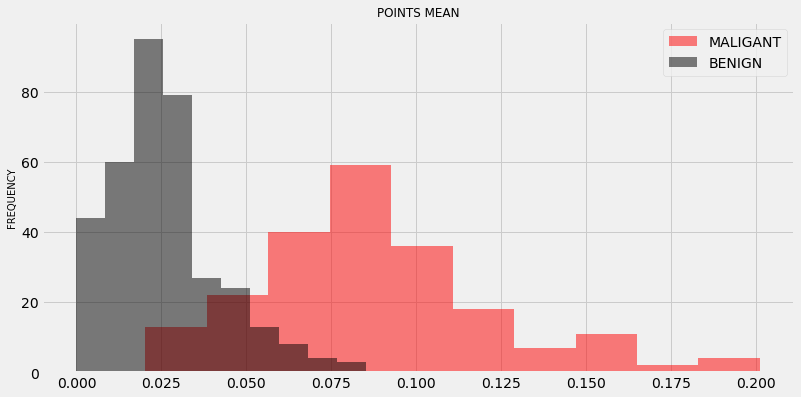

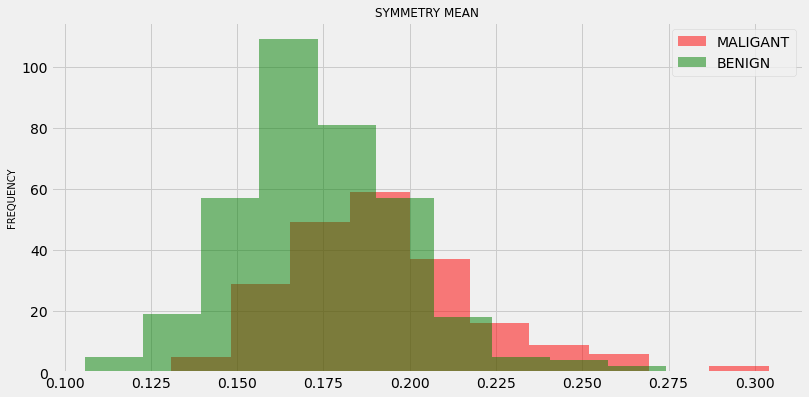

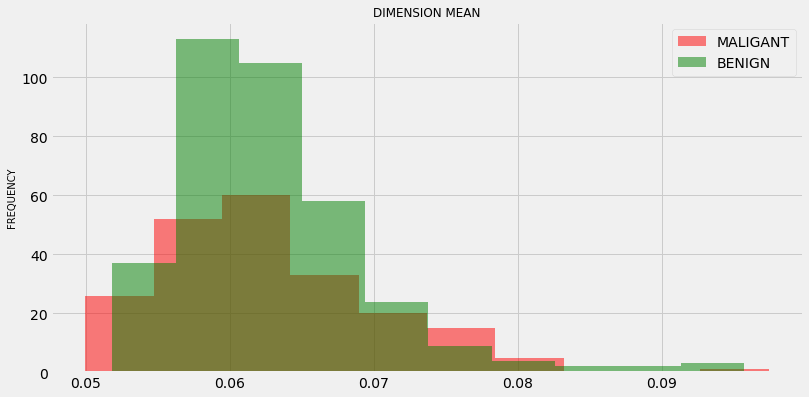

In [10]:
#Radius Mean
plt.hist(df["radius_mean"][df["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(df["radius_mean"][df["diagnosis"]=="B"],color="green",alpha=0.5)
plt.title("RADIUS MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

#Texture Mean
plt.hist(df["texture_mean"][df["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(df["texture_mean"][df["diagnosis"]=="B"],color="green",alpha=0.5)
plt.title("TEXTURE MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

#Perimeter Mean
plt.hist(df["perimeter_mean"][df["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(df["perimeter_mean"][df["diagnosis"]=="B"],color="green",alpha=0.5)
plt.title("PERIMETER MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

#Area Mean
plt.hist(df["area_mean"][df["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(df["area_mean"][df["diagnosis"]=="B"],color="green",alpha=0.5)
plt.title("AREA MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

#Smoothness Mean
plt.hist(df["smoothness_mean"][df["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(df["smoothness_mean"][df["diagnosis"]=="B"],color="green",alpha=0.5)
plt.title("SMOOTHNESS MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

#Compactness Mean
plt.hist(df["compactness_mean"][df["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(df["compactness_mean"][df["diagnosis"]=="B"],color="green",alpha=0.5)
plt.title("CONCAVITY MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

#Concavity Mean
plt.hist(df["concavity_mean"][df["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(df["concavity_mean"][df["diagnosis"]=="B"],color="green",alpha=0.5)
plt.title("CONCAVITY MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

#Concave Points Mean
plt.hist(df["points_mean"][df["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(df["points_mean"][df["diagnosis"]=="B"],color="black",alpha=0.5)
plt.title("POINTS MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

#Symmetry Mean
plt.hist(df["symmetry_mean"][df["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(df["symmetry_mean"][df["diagnosis"]=="B"],color="green",alpha=0.5)
plt.title("SYMMETRY MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

#Fractal Dimension Mean
plt.hist(df["dimension_mean"][df["diagnosis"]=="M"],color="red",alpha=0.5)
plt.hist(df["dimension_mean"][df["diagnosis"]=="B"],color="green",alpha=0.5)
plt.title("DIMENSION MEAN",fontsize=12,color="black")
plt.ylabel("FREQUENCY",fontsize=10,color="black")
plt.legend(["MALIGANT","BENIGN"])
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)
plt.show()

From the above histogram plots we see that the values which will be useful in classifying cancer are - Cell radius, perimeter, Area, Compactness, Concavity and concave points. The texture, smoothness, Symmentry, Fractual Dimension fields are not so 
relavant in determaining if the cancer is malignant or benign. 

Let us now observe the correlation of the data.

In [11]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Vizualizing the correlation we get,

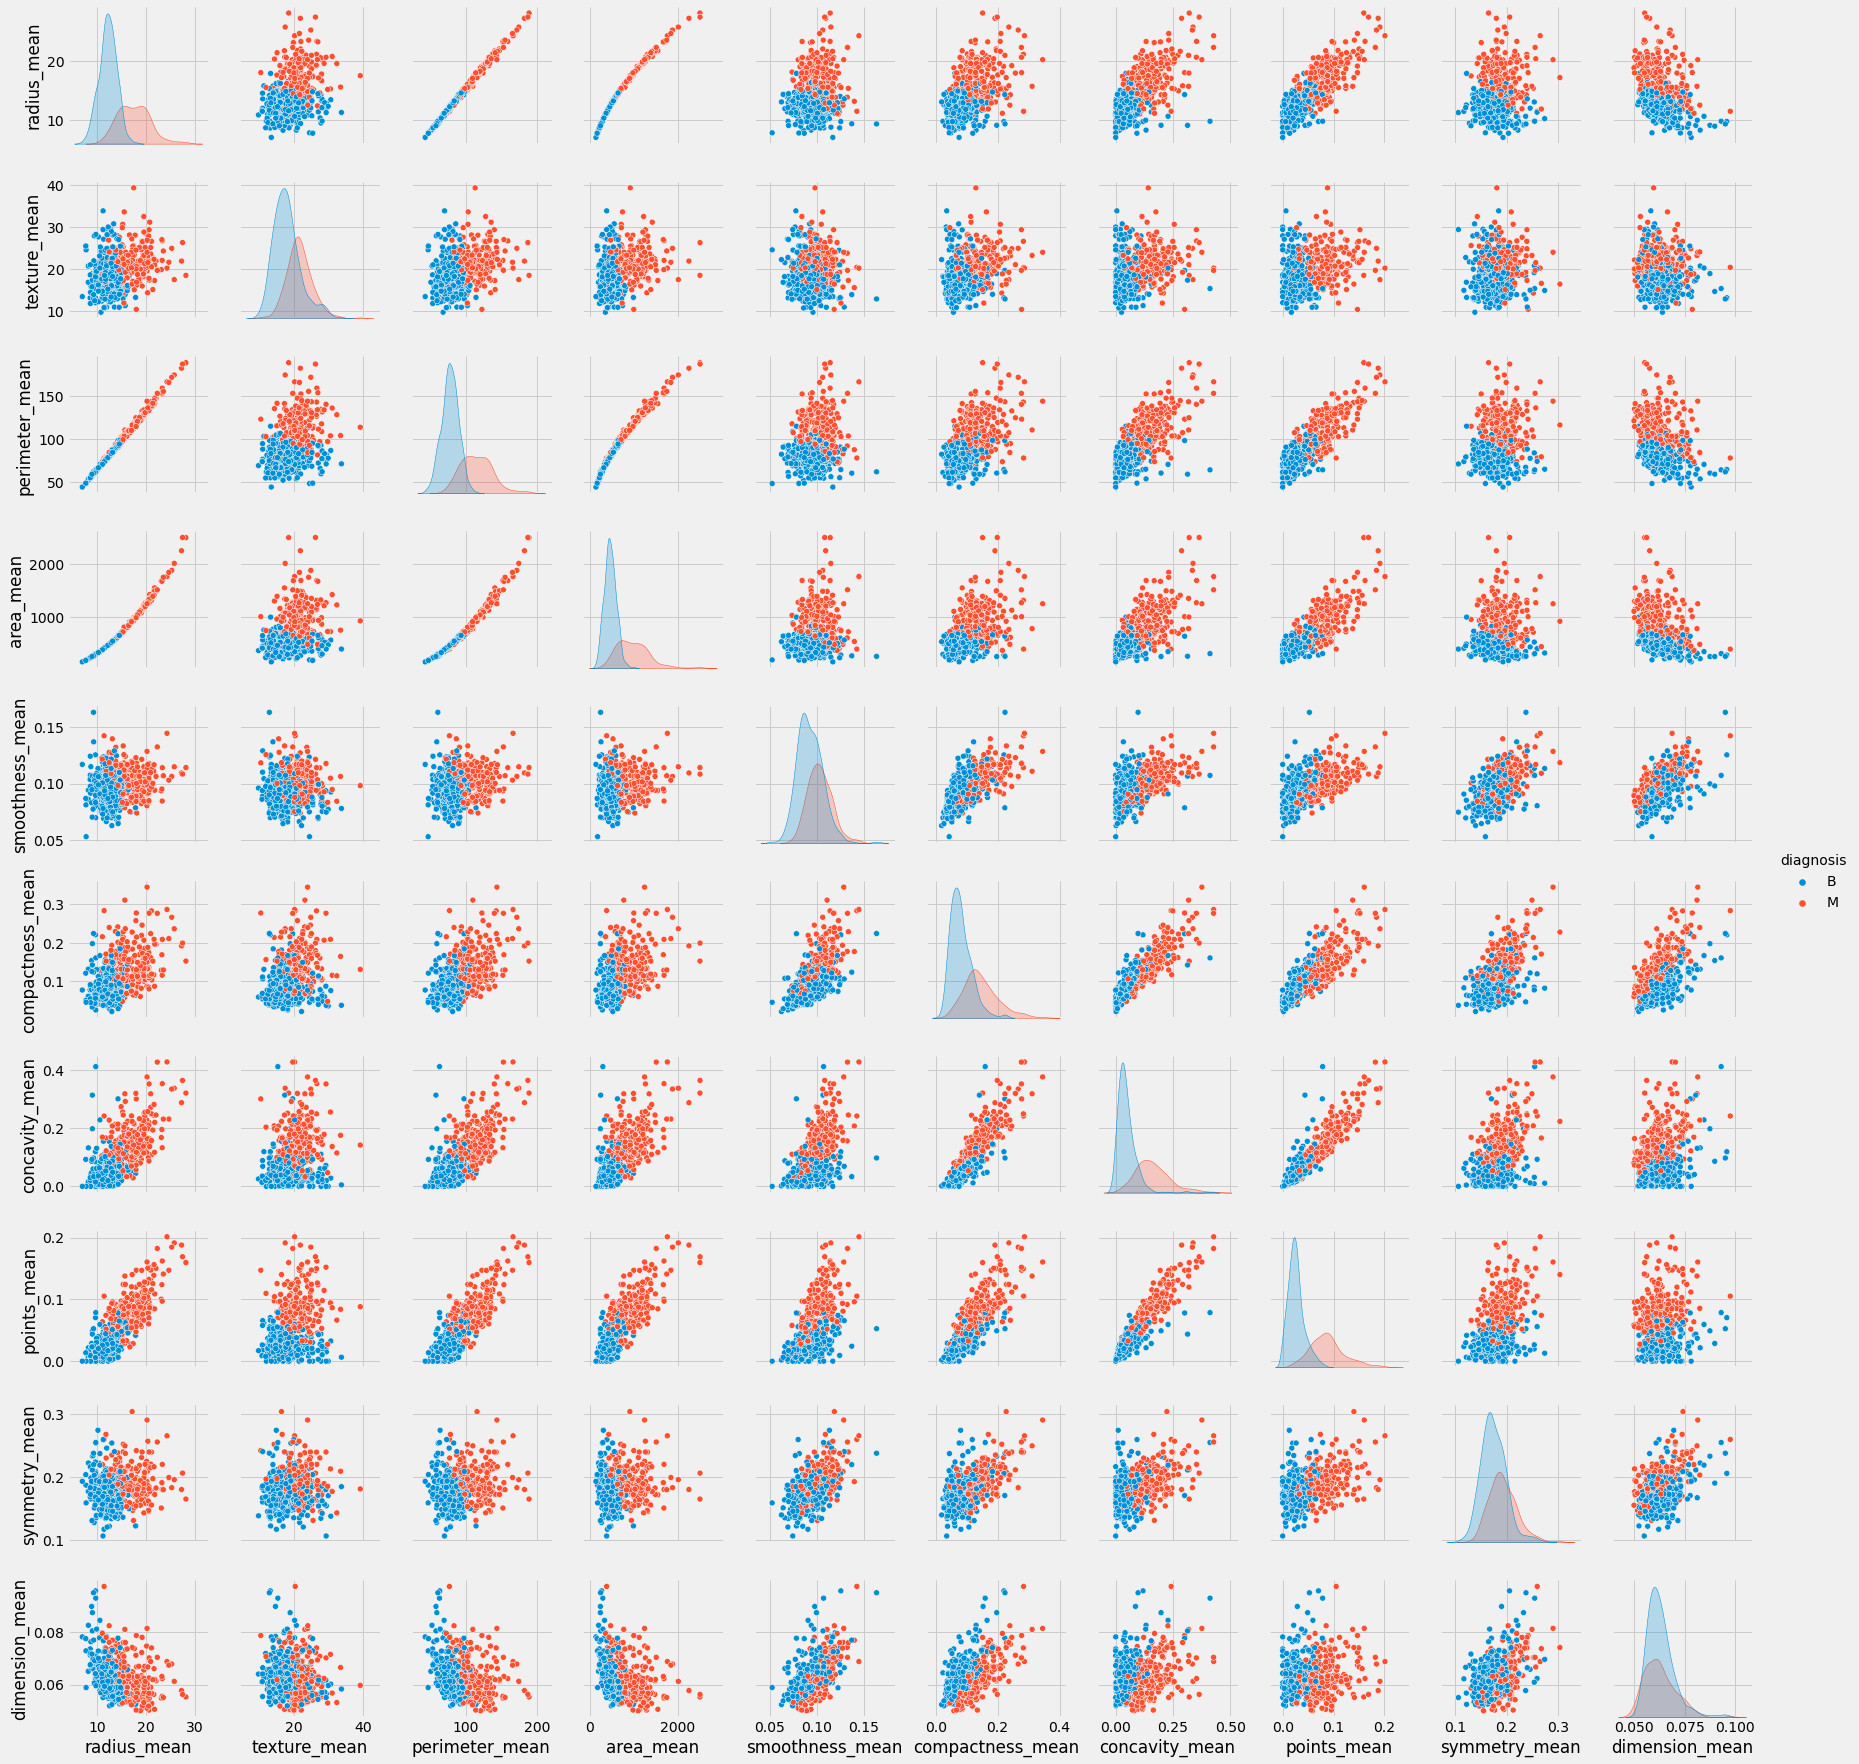

In [12]:
mean_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean']

sns.pairplot(df[mean_col],hue = 'diagnosis')

# blue = benign
# red = malignant

## Creating a Testing and Training set
<hr></hr>

In [13]:
x = df.drop(columns = 'diagnosis')
y = df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

Now, let us test the data set in Random forest classification model

In [14]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred=rfc.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",rfc.score(x_train,y_train)*100)
#Printing the accuracy of the model
print("The accuracy of the Random Forest Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
rfc_results=accuracy_score(y_test, y_pred)*100


              precision    recall  f1-score   support

           B       0.96      1.00      0.98       113
           M       1.00      0.91      0.95        58

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

[[113   0]
 [  5  53]]
Training Score:  100.0
The accuracy of the Random Forest Classifier Model is:  97.07602339181285 %
